In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm
from collections import defaultdict
from itertools import combinations
import pickle
import os

from load_graph import *

In [3]:
def intersection_icdf(endpoints, nodes_per_com, coms_per_node, n_to_overlap):
    icdf = np.zeros(len(endpoints), dtype="float64")
    for node_coms in tqdm(coms_per_node):
        for coms in combinations(node_coms, n_to_overlap):
            size = len(frozenset.intersection(*[nodes_per_com[i] for i in coms]))
            icdf[endpoints <= size] += 1/size
    return icdf / np.sum(icdf)


def overlaps_dict(endpoints, nodes_per_com, coms_per_node):
    data = dict()
    data["two_overlaps"] = intersection_icdf(endpoints, nodes_per_com, coms_per_node, 2)
    data["three_overlaps"] = intersection_icdf(endpoints, nodes_per_com, coms_per_node, 3)
    data["four_overlaps"] = intersection_icdf(endpoints, nodes_per_com, coms_per_node, 4)
    return data

In [5]:
# load or generate data
file = "community_overlap_data.pkl"
if os.path.isfile(file):
    with open(file, "rb") as f:
        data = pickle.loads(f)
    print("Data loaded from file.")
else:
    print("File not present, crucnhing numbers...")
    data = dict()
    endpoints = np.logspace(0, 5, 200) # 10^5 is larger than the largest overlap
    
    # Youtube
    data["youtube"] = dict()
    # g, coms = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
    # data["youtube"]["Youtube"] = overlaps_dict(endpoints, coms, g.vs["comms"])
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_youtube_d2_com.dat", False)
    # data["youtube"]["D=2"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node  = load_coms("data/abcdoo_youtube_d8_com.dat", False)
    # data["youtube"]["D=8"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node  = load_coms("data/abcdoo_youtube_d64_com.dat", False)
    # data["youtube"]["D=64"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node  = load_coms("data/cbk_youtube.dat", False)
    # data["youtube"]["CBK"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)

    # # DBLP
    data["dblp"] = dict()
    # g, coms = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
    # data["dblp"]["DBLP"] = overlaps_dict(endpoints, coms, g.vs["comms"])
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d2_com.dat", True)
    # data["dblp"]["D=2"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d8_com.dat", True)
    # data["dblp"]["D=8"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d64_com.dat", True)
    data["dblp"]["D=64"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    nodes_per_com, coms_per_node = load_coms("data/cbk_dblp.dat", True)
    data["dblp"]["CBK"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)

    # # Amazon
    # data["amazon"] = dict()
    # _, real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
    # data["amazon"]["Amazon"] = overlaps_dict(endpoints, coms, g.vs["comms"])
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_amazon_d2_com.dat", True)
    # data["amazon"]["D=2"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_amazon_d8_com.dat", True)
    # data["amazon"]["D=8"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node = load_coms("data/abcdoo_amazon_d64_com.dat", True)
    # data["amazon"]["D=64"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    # nodes_per_com, coms_per_node = load_coms("data/cbk_amazon.dat", True)
    # data["amazon"]["CBK"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)

    with open(file, "wb") as f:
        pickle.dump(data, f)

File not present, crucnhing numbers...


  1%|          | 1634/317080 [00:37<2:00:54, 43.48it/s]


KeyboardInterrupt: 

In [12]:
# load or generate data
file = "data/youtube_overlap_data.pkl"
if os.path.isfile(file):
    with open(file, "rb") as f:
        data = pickle.load(f)
    print("Data loaded from file.")
else:
    print("File not present, crucnhing numbers...")
    data = dict()
    endpoints = np.logspace(0, 5, 200) # 10^5 is larger than the largest overlap
    data["endpoints"] = endpoints
    
    # Youtube
    print("Youtube")
    g, coms = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
    data["Youtube"] = overlaps_dict(endpoints, coms, g.vs["comms"])
    print("D=2")
    nodes_per_com, coms_per_node = load_coms("data/abcdoo_youtube_d2_com.dat", False)
    data["D=2"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("D=8")
    nodes_per_com, coms_per_node  = load_coms("data/abcdoo_youtube_d8_com.dat", False)
    data["D=8"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("D=64")
    nodes_per_com, coms_per_node  = load_coms("data/abcdoo_youtube_d64_com.dat", False)
    data["D=64"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("CBK")
    nodes_per_com, coms_per_node  = load_coms("data/cbk_youtube.dat", False)
    data["CBK"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)

    with open(file, "wb") as f:
        pickle.dump(data, f)

Data loaded from file.


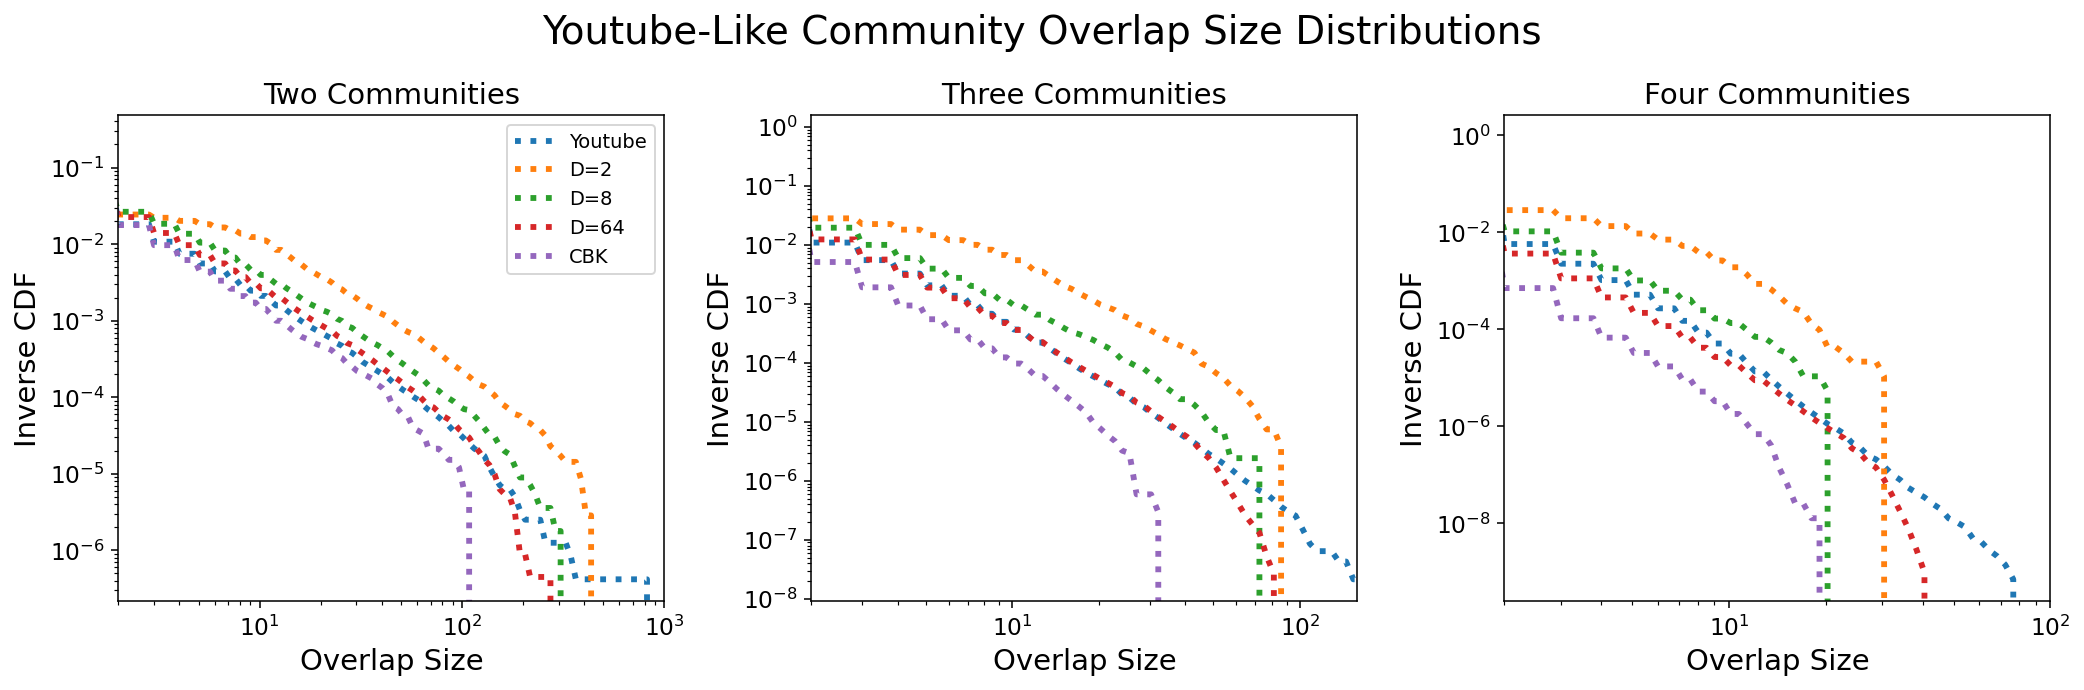

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
names = ["Youtube", "D=2", "D=8", "D=64", "CBK"]
plots = ["two_overlaps", "three_overlaps", "four_overlaps"]

for name in names:
    for i, plot in enumerate(plots):
        axs[i].plot(data["endpoints"], data[name][plot], linewidth=3, linestyle=":", label=name)


for i in range(len(axs)):
    axs[i].set_xlabel("Overlap Size", fontsize=15)
    axs[i].set_ylabel("Inverse CDF", fontsize=15)
    axs[i].tick_params(labelsize=12)
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
        
axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15)
# xlims set manuually after looking at plots
axs[0].set_xlim((2, 10**3))
axs[1].set_xlim((2, 10**2.2))
axs[2].set_xlim((2, 10**2))
plt.suptitle("Youtube-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

In [ ]:
# load or generate data
file = "data/dblp_overlap_data.pkl"
if os.path.isfile(file):
    with open(file, "rb") as f:
        data = pickle.load(f)
    print("Data loaded from file.")
else:
    print("File not present, crucnhing numbers...")
    data = dict()
    endpoints = np.logspace(0, 5, 200) # 10^5 is larger than the largest overlap
    data["endpoints"] = endpoints
    
    # DBLP
    print("DBLP")
    g, coms = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
    data["DBLP"] = overlaps_dict(endpoints, coms, g.vs["comms"])
    print("D=2")
    nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d2_com.dat", True)
    data["D=2"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("D=8")
    nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d8_com.dat", True)
    data["D=8"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("D=64")
    nodes_per_com, coms_per_node = load_coms("data/abcdoo_dblp_d64_com.dat", True)
    data["D=64"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)
    print("D=CBK")
    nodes_per_com, coms_per_node = load_coms("data/cbk_dblp.dat", True)
    data["CBK"] = overlaps_dict(endpoints, nodes_per_com, coms_per_node)

    with open(file, "wb") as f:
        pickle.dump(data, f)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
names = ["DBLP", "D=2", "D=8", "D=64", "CBK"]
plots = ["two_overlaps", "three_overlaps", "four_overlaps"]

for name in names:
    for i, plot in enumerate(plots):
        axs[i].plot(data["endpoints"], data[name][plot], linewidth=3, linestyle=":", label=name)


for i in range(len(axs)):
    axs[i].set_xlabel("Overlap Size", fontsize=15)
    axs[i].set_ylabel("Inverse CDF", fontsize=15)
    axs[i].tick_params(labelsize=12)
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
        
axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15)
# xlims set manuually after looking at plots
# axs[0].set_xlim((2, 10**3))
# axs[1].set_xlim((2, 10**2.2))
# axs[2].set_xlim((2, 10**2))
plt.suptitle("DBLP-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

In [2]:
def get_overlap(coms, right_endpoints):
    # Counts for Inverse ICDF (# data points <= right_endpoint)
    two_overlap_icdf = np.zeros(len(right_endpoints), dtype="int64")
    three_overlap_icdf = np.zeros(len(right_endpoints), dtype="int64")
    four_overlap_icdf = np.zeros(len(right_endpoints), dtype="int64")

    two_overlap = [set() for i in range(len(coms))] # index i is a set of coms that overlap with community i
    for i in trange(len(coms)):
        for j in range(i):
            size = len(coms[i].intersection(coms[j]))
            if size > 0:
                two_overlap_icdf[right_endpoints <= size] += 1
                two_overlap[i].add(j)
                two_overlap[j].add(i)

    for i in range(len(two_overlap)):
        two_overlap[i] = frozenset(two_overlap[i])

    three_overlaps = defaultdict(set)  # key (i,j) for i < j is a set of coms k such that the intersection i,j,k is non-empty
    ij_to_search = set()
    # skip if the indexes are not in the order i < j < k
    for i in trange(len(two_overlap)):
        for j in two_overlap[i]:
            if not i < j:
                continue
            for k in frozenset.intersection(two_overlap[i], two_overlap[j]):
                if not j < k:
                    continue
                size = len(frozenset.intersection(coms[i], coms[j], coms[k]))
                if size > 0:
                    three_overlap_icdf[right_endpoints <= size] += 1
                    three_overlaps[(i,j)].add(k)
                    three_overlaps[(i,k)].add(j)
                    three_overlaps[(j,k)].add(i)
                    ij_to_search.add((i,j))

    # Clear some memory
    del two_overlap
    for i, s in three_overlaps.items():
        three_overlaps[i] = frozenset(s)

    
    # skip if the indexes are not in the order i < j < k < l
    for i,j in tqdm(ij_to_search):
        if not i < j:
            continue
        for k in three_overlaps[(i,j)]:
            if not j < k:
                continue
            common_overlap = frozenset.intersection(three_overlaps[(i,j)], three_overlaps[(i,k)], three_overlaps[(j,k)])
            for l in common_overlap:
                if not k < l:
                    continue
                size = len(frozenset.intersection(coms[i], coms[j], coms[k], coms[l]))
                if size > 0:
                    four_overlap_icdf[right_endpoints <= size] += 1
    
    del three_overlaps
    del ij_to_search

    return two_overlap_icdf/np.sum(two_overlap_icdf), three_overlap_icdf/np.sum(three_overlap_icdf), four_overlap_icdf/np.sum(four_overlap_icdf)


In [4]:
# load or generate data
file = "community_overlap_data.pkl"
if os.path.isfile(file):
    with open(file, "rb") as f:
        data = pickle.loads(f)
    print("Data loaded from file.")
else:
    print("File not present, crucnhing numbers...")
    data = dict()
    endpoints = np.logspace(0, 5, 200) # 10^5 is larger than the largest overlap
    
    # Youtube
    data["youtube"] = dict()
    _, real = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
    abcdoo_d2, _ = load_coms("data/abcdoo_youtube_d2_com.dat", False)
    abcdoo_d5, _  = load_coms("data/abcdoo_youtube_d5_com.dat", False)
    abcdoo_d10, _  = load_coms("data/abcdoo_youtube_d10_com.dat", False)
    cbk, _  = load_coms("data/cbk_youtube.dat", False)
    options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
    names = ["Youtube", "D=2", "D=5", "D=10", "CBK"]
    for coms, name in zip(options, names):
        print(name)
        two, three, four = get_overlap(coms, endpoints)
        data["youtube"][name] = dict()
        data["youtube"][name]["two_overlap"] = two
        data["youtube"][name]["three_overlap"] = three
        data["youtube"][name]["four_overlap"] = four
        data["youtube"][name]["endpoints"] = endpoints

    # DBLP
    data["dblp"] = dict()
    _, real = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
    abcdoo_d2, _ = load_coms("data/abcdoo_dblp_d2_com.dat", True)
    abcdoo_d5, _ = load_coms("data/abcdoo_dblp_d5_com.dat", True)
    abcdoo_d10, _ = load_coms("data/abcdoo_dblp_d10_com.dat", True)
    cbk, _ = load_coms("data/cbk_dblp.dat", True)
    options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
    names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]
    for coms, name in zip(options, names):
        print(name)
        two, three, four = get_overlap(coms, endpoints)
        data["dblp"][name] = dict()
        data["dblp"][name]["two_overlap"] = two
        data["dblp"][name]["three_overlap"] = three
        data["dblp"][name]["four_overlap"] = four
        data["dblp"][name]["endpoints"] = endpoints

    # Amazon
    data["amazon"] = dict()
    _, real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
    abcdoo_d2, _ = load_coms("data/abcdoo_amazon_d2_com.dat", True)
    abcdoo_d5, _ = load_coms("data/abcdoo_amazon_d5_com.dat", True)
    abcdoo_d10, _ = load_coms("data/abcdoo_amazon_d10_com.dat", True)
    cbk, _ = load_coms("data/cbk_amazon.dat", True)
    options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
    names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]
    for coms, name in zip(options, names):
        print(name)
        two, three, four = get_overlap(coms, endpoints)
        data["amazon"][name] = dict()
        data["amazon"][name]["two_overlap"] = two
        data["amazon"][name]["three_overlap"] = three
        data["amazon"][name]["four_overlap"] = four
        data["amazon"][name]["endpoints"] = endpoints
    
    with open(file, "wb") as f:
        pickle.dump(data, f)

File not present, crucnhing numbers...
Youtube


100%|██████████| 346715/346715 [17:37<00:00, 327.98it/s]


D=2


100%|██████████| 5965/5965 [00:00<00:00, 120003.37it/s]


D=5


100%|██████████| 12079/12079 [00:00<00:00, 82881.54it/s]


D=10


100%|██████████| 36519/36519 [00:02<00:00, 15845.70it/s]


CBK


100%|██████████| 68875/68875 [03:57<00:00, 289.77it/s]


DBLP


100%|██████████| 564205/564205 [14:34<00:00, 644.83it/s]


D=2


100%|██████████| 25030/25030 [00:00<00:00, 25579.89it/s]


D=5


100%|██████████| 50411/50411 [00:02<00:00, 18315.76it/s]


D=10


100%|██████████| 134852/134852 [01:10<00:00, 1917.31it/s]


CBK


 46%|████▌     | 1049575/2283726 [5:33:25<1:20:32, 255.41it/s] 

DBLP: min coms is 6 and max is 7556
DBLP: min coms is 11 and max is 7353
DBLP: min coms is 11 and max is 7421
DBLP: min coms is 11 and max is 6919
DBLP: min coms is 10 and max is 7356
DBLP


100%|██████████| 564205/564205 [14:55<00:00, 629.85it/s]


D=2


100%|██████████| 25030/25030 [00:00<00:00, 25497.31it/s]


D=5


100%|██████████| 50411/50411 [00:02<00:00, 18572.46it/s]


D=10


100%|██████████| 134852/134852 [01:07<00:00, 2002.74it/s]


CBK


100%|██████████| 2283726/2283726 [12:08:39<00:00, 52.24it/s]   


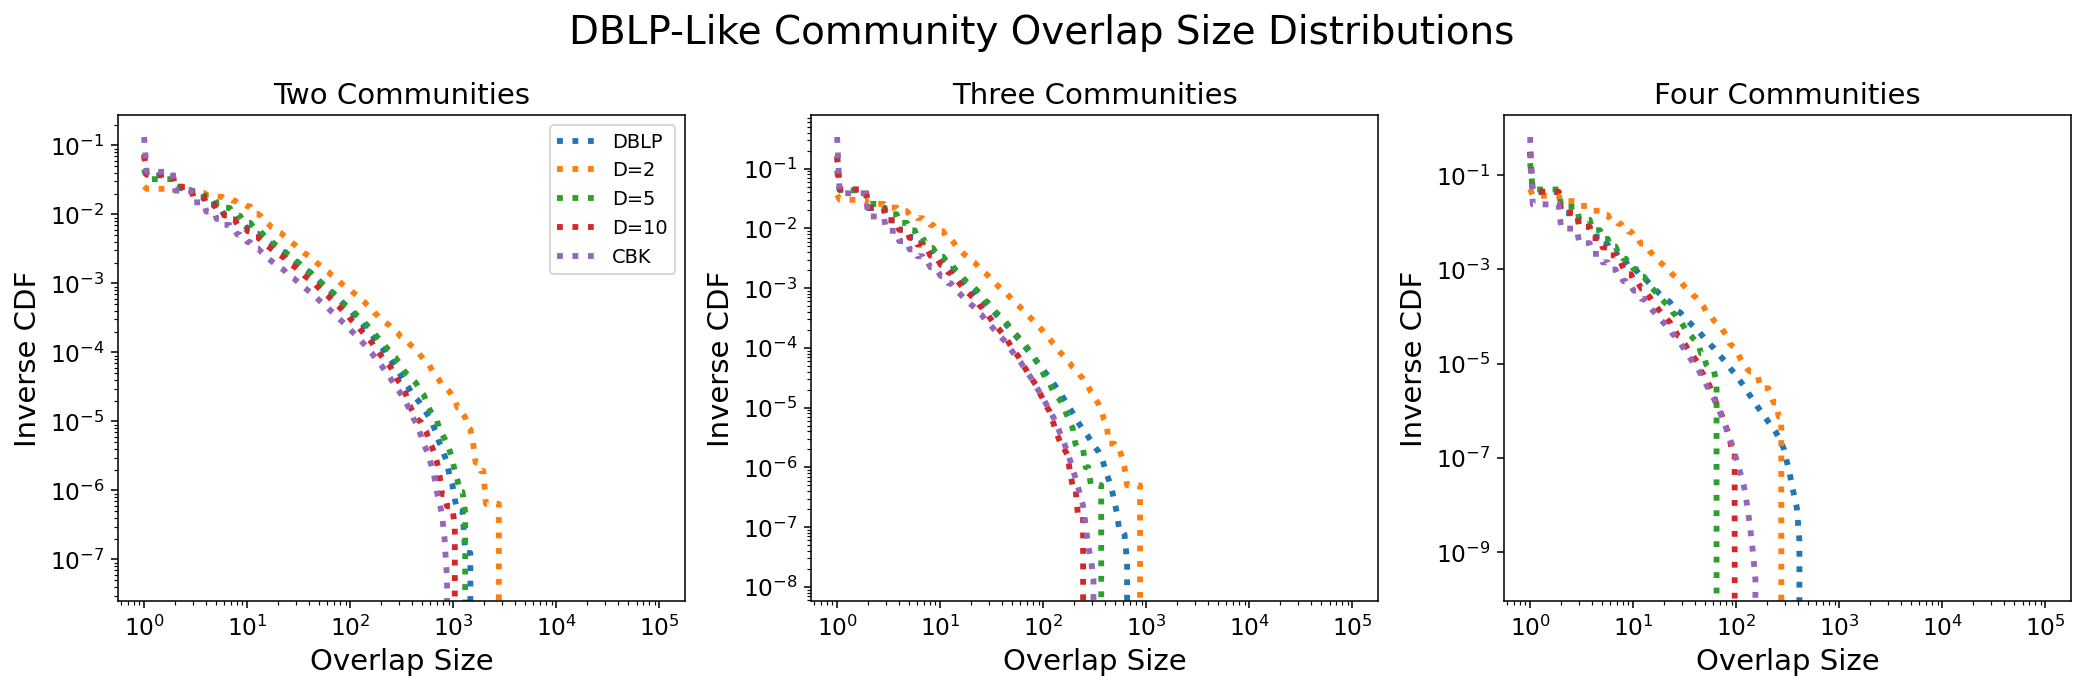

In [3]:
## DBLP graph
_, real = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
abcdoo_d2, _ = load_coms("data/abcdoo_dblp_d2_com.dat", True)
abcdoo_d5, _ = load_coms("data/abcdoo_dblp_d5_com.dat", True)
abcdoo_d10, _ = load_coms("data/abcdoo_dblp_d10_com.dat", True)
cbk, _ = load_coms("data/cbk_dblp.dat", True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    print(name)
    endpoints, two, three, four = get_overlap(coms)

    for i, data in enumerate([two, three, four]):
        axs[i].plot(endpoints, data, linewidth=3, linestyle=":", label=name)

for i in range(len(axs)):
    axs[i].set_xlabel("Overlap Size", fontsize=15)
    axs[i].set_ylabel("Inverse CDF", fontsize=15)
    axs[i].tick_params(labelsize=12)
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")
        
axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("DBLP-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

In [4]:
## Amazon graph
_, real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
abcdoo_d2, _ = load_coms("data/abcdoo_amazon_d2_com.dat", True)
abcdoo_d5, _ = load_coms("data/abcdoo_amazon_d5_com.dat", True)
abcdoo_d10, _ = load_coms("data/abcdoo_amazon_d10_com.dat", True)
cbk, _ = load_coms("data/cbk_amazon.dat", True)

print(f"Amazon: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"Amazon: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    print(name)
    endpoints, two, three, four = get_overlap(coms)

    for i, data in enumerate([two, three, four]):
        axs[i].plot(endpoints, data, linewidth=3, linestyle=":", label=name)

for i in range(len(axs)):
    axs[i].set_xlabel("Overlap Size", fontsize=15)
    axs[i].set_ylabel("Inverse CDF", fontsize=15)
    axs[i].tick_params(labelsize=12)
    axs[i].set_yscale("log")
    axs[i].set_xscale("log")

axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("Amazon-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)

Amazon: min coms is 3 and max is 53551
Amazon: min coms is 14 and max is 49390
Amazon: min coms is 14 and max is 32127
Amazon: min coms is 14 and max is 39709
Amazon: min coms is 10 and max is 26761
Amazon


100%|██████████| 917462/917462 [1:04:04<00:00, 238.63it/s] 


D=2


100%|██████████| 279718/279718 [04:18<00:00, 1080.91it/s]


D=5


100%|██████████| 532752/532752 [12:00<00:00, 739.57it/s]  


D=10


 86%|████████▌ | 1101921/1280821 [1:52:42<03:02, 981.03it/s] 

Youtube: min coms is 2 and max is 3001
D2: min coms is 12 and max is 2330
D5: min coms is 12 and max is 2553
D10: min coms is 12 and max is 2967
CBK: min coms is 10 and max is 2494
Youtube


100%|██████████| 346715/346715 [17:35<00:00, 328.38it/s]
/var/folders/5s/s9kq6m214mg0gjl81gfw4bv00000gn/T/ipykernel_19965/2982960891.py:56: RuntimeWarning: invalid value encountered in divide
  return right_endpoints, two_overlap_icdf/np.sum(two_overlap_icdf), three_overlap_icdf/np.sum(three_overlap_icdf), four_overlap_icdf/np.sum(four_overlap_icdf)


D=2


100%|██████████| 5965/5965 [00:00<00:00, 114432.31it/s]


D=5


100%|██████████| 12079/12079 [00:00<00:00, 72231.04it/s]


D=10


100%|██████████| 36519/36519 [00:02<00:00, 15429.45it/s]


CBK


100%|██████████| 68875/68875 [03:57<00:00, 289.56it/s]


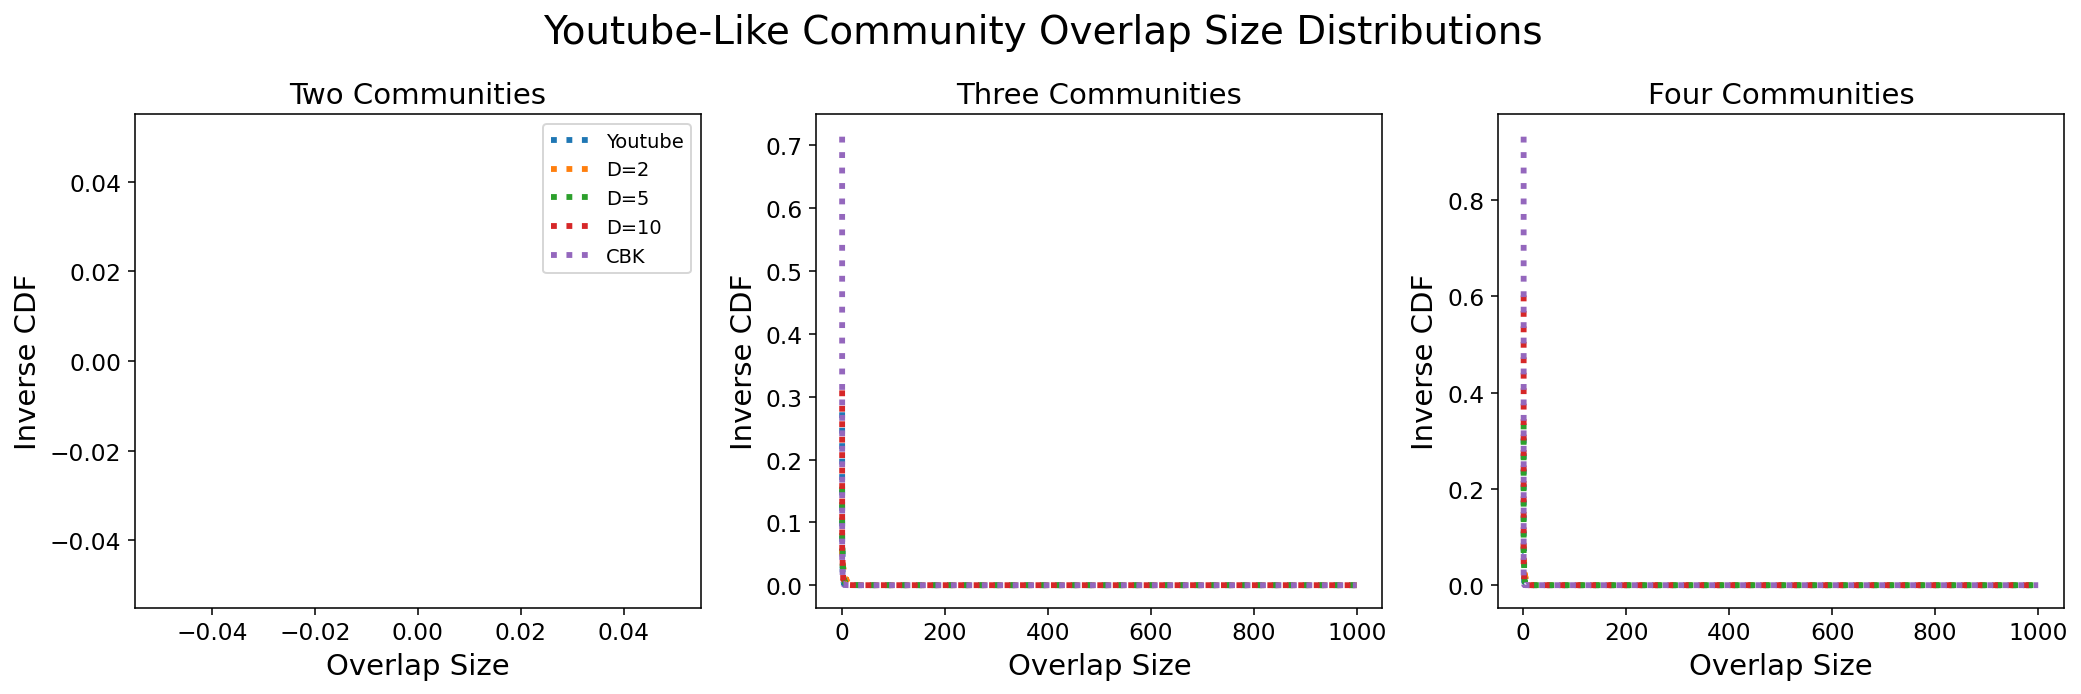

In [ ]:
## Youtube graph
_, real = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
abcdoo_d2, _ = load_coms("data/abcdoo_youtube_d2_com.dat", False)
abcdoo_d5, _  = load_coms("data/abcdoo_youtube_d5_com.dat", False)
abcdoo_d10, _  = load_coms("data/abcdoo_youtube_d10_com.dat", False)
cbk, _  = load_coms("data/cbk_youtube.dat", False)

print(f"Youtube: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"D2: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"D5: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"D10: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"CBK: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Youtube", "D=2", "D=5", "D=10", "CBK"]
for coms, name in zip(options, names):
    print(name)
    endpoints, two, three, four = get_overlap(coms)

    for i, data in enumerate([two, three, four]):
        axs[i].plot(endpoints, data, linewidth=3, linestyle=":", label=name)

for i in range(len(axs)):
    axs[i].set_xlabel("Overlap Size", fontsize=15)
        axs[i].set_ylabel("Inverse CDF", fontsize=15)
        axs[i].tick_params(labelsize=12)
        axs[i].set_yscale("log")
        axs[i].set_xscale("log")
axs[0].legend()
axs[0].set_title("Two Communities", fontsize=15)
axs[1].set_title("Three Communities", fontsize=15) 
axs[2].set_title("Four Communities", fontsize=15) 
plt.suptitle("Youtube-Like Community Overlap Size Distributions", fontsize=20)
plt.tight_layout()
fig.set_dpi(140)